## **Introduction**

Dans ce projet, j’ai développé un modèle de classification supervisée en utilisant plusieurs algorithmes de machine learning tels que la régression logistique, les SVM, les KNN et les arbres de décision. Mon objectif principal était d’analyser les données, de préparer les caractéristiques pertinentes et de construire un modèle capable de prédire avec précision les classes associées. J’ai utilisé des techniques d’optimisation comme GridSearchCV pour ajuster les hyperparamètres et améliorer les performances des modèles. Enfin, j’ai évalué mes résultats en m’appuyant sur des métriques comme l’accuracy, le F1-score et des visualisations telles que les matrices de confusion et les courbes ROC, afin de garantir une solution fiable et robuste.

1. Chargement des données 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("updated_pollution_dataset.csv")  
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [ ]:
# Affichage les premières lignes
print(df.head())

# Dimensions des données
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Résumé statistique des variables
print(df.describe())

# Informations sur le type de données
print(df.info())


   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  
Nombre de lignes : 5000
Nombre de colonnes : 10
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140   

2. Préparation des données 

In [3]:
# Compter les valeurs manquantes par colonne
print(df.isnull().sum())


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

# Colonnes numériques
numerical_columns = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 
                     'Proximity_to_Industrial_Areas', 'Population_Density']

# Normalisation des données numériques
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encodage de la variable cible
label_encoder = LabelEncoder()
df['Air Quality'] = label_encoder.fit_transform(df['Air Quality'])


In [6]:
print("Classes encodées :", dict(enumerate(label_encoder.classes_)))


Classes encodées : {0: 'Good', 1: 'Hazardous', 2: 'Moderate', 3: 'Poor'}


3. Traitement des données 

In [7]:
from sklearn.model_selection import train_test_split

# Caractéristiques (features) et étiquette (label)
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

# Séparation des ensembles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


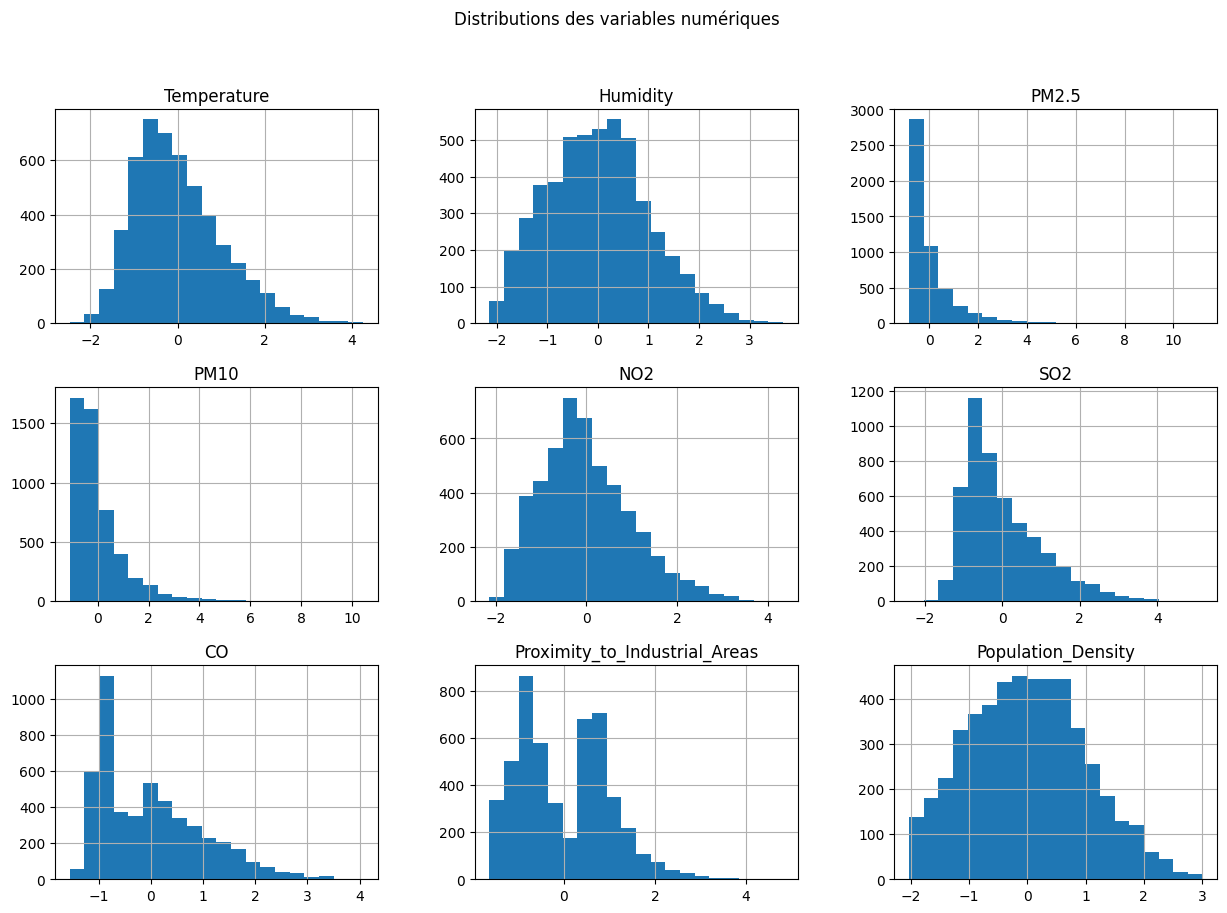

In [8]:
# Histogrammes des variables numériques
df[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distributions des variables numériques')
plt.show()


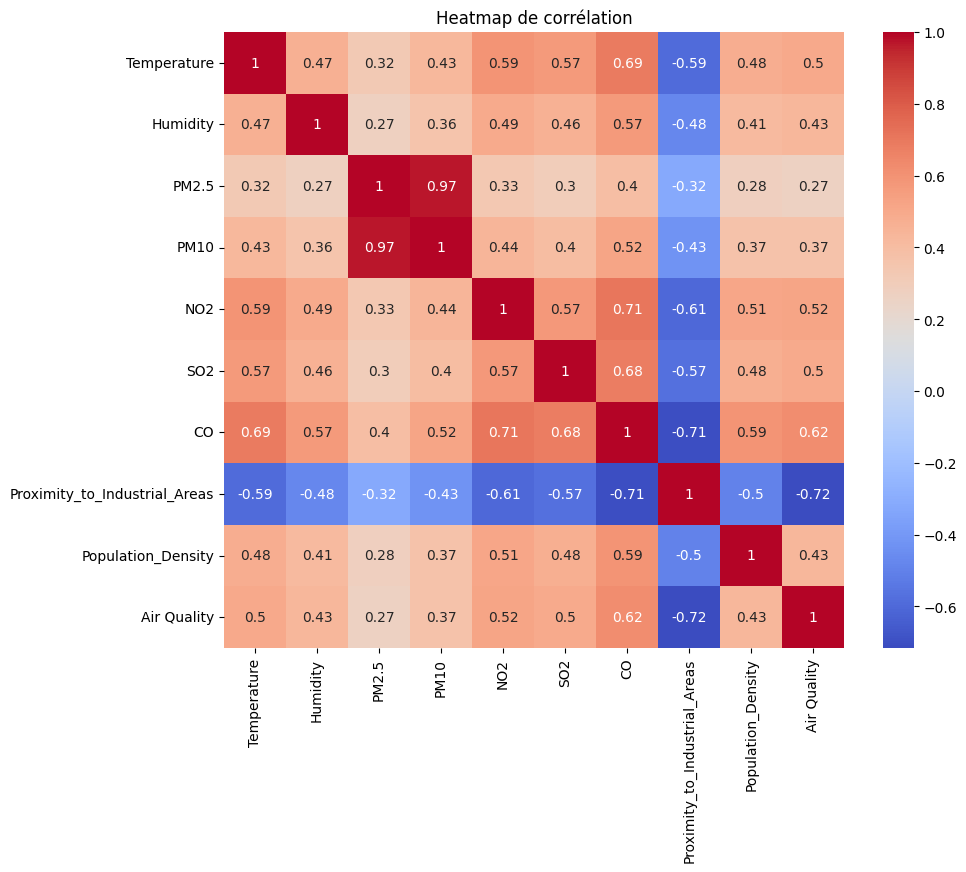

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de corrélation")
plt.show()


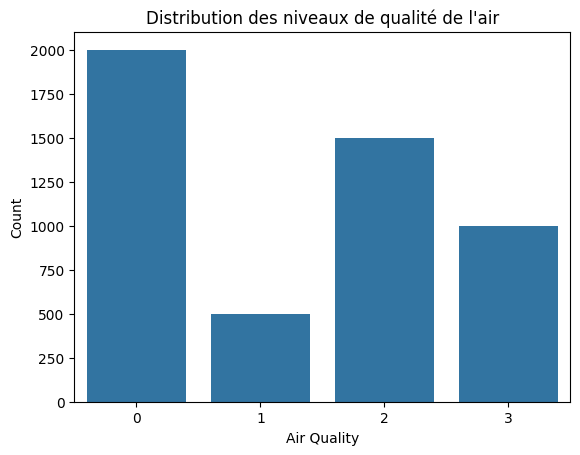

In [10]:
# Distribution des niveaux de qualité de l'air
sns.countplot(x='Air Quality', data=df)
plt.title("Distribution des niveaux de qualité de l'air")
plt.xlabel("Air Quality")
plt.ylabel("Count")
plt.show()


4. Mise en place de l'architecture 
- Scikit-learn -

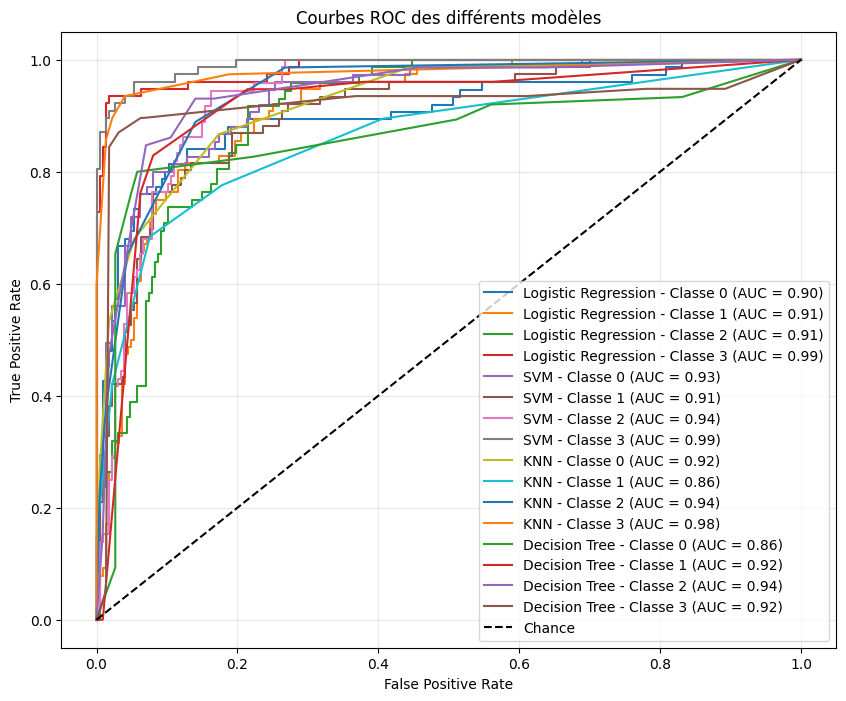

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_informative=4,  
    n_redundant=2, 
    n_classes=4, 
    n_clusters_per_class=1, 
    random_state=42
)
y_binarized = label_binarize(y, classes=[0, 1, 2, 3])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.3, random_state=42)

# Initialiser les modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

# Tracer les courbes ROC pour chaque modèle
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train.argmax(axis=1))
    
    # Calculer les probabilités prédites ou les scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
    
    # Calculer les courbes ROC pour chaque classe
    for i in range(y_binarized.shape[1]):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        
        # Tracer la courbe ROC
        plt.plot(fpr, tpr, label=f"{name} - Classe {i} (AUC = {roc_auc:.2f})")

# Configurer le graphique
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbes ROC des différents modèles")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# Analyse des performances des modèles

#### Résumé
Cette courbe ROC compare les performances de quatre modèles de classification (**régression logistique**, **SVM**, **KNN**, **arbre de décision**) sur plusieurs classes en mesurant l’aire sous la courbe (AUC) pour chaque classe.

#### Observations :
- **Régression logistique** et **SVM** :
  - Ces modèles affichent les meilleures performances globales, avec des AUC élevées.
  - Particulièrement remarquable pour la classe 3 (AUC = 0.99).
- **KNN** :
  - Résultats compétitifs, bien que légèrement inférieurs pour certaines classes (ex. classe 1 avec AUC = 0.86).
- **Arbre de décision** :
  - Modèle le moins performant globalement, notamment pour la classe 0 (AUC = 0.86).



In [25]:
from sklearn.model_selection import cross_val_score

# Convertir les étiquettes en format non binarisé
y_train_non_binarized = y_train.argmax(axis=1)

# Comparer les modèles avec validation croisée
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train_non_binarized, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.3f}, Std Dev = {scores.std():.3f}")


Logistic Regression: Mean Accuracy = 0.764, Std Dev = 0.044
SVM: Mean Accuracy = 0.770, Std Dev = 0.037
KNN: Mean Accuracy = 0.764, Std Dev = 0.034
Decision Tree: Mean Accuracy = 0.794, Std Dev = 0.045


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Convertir les étiquettes en format non binarisé
y_train_non_binarized = y_train.argmax(axis=1)

# Définir la grille d'hyperparamètres
param_grid = {
    'C': [0.1, 1, 10],  # Régularisation
    'penalty': ['l2'],  # Régularisation L2 uniquement
    'solver': ['lbfgs', 'liblinear']  # Solveurs compatibles avec L2
}

# Configuration et entraînement de GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,  # Validation croisée à 5 plis
    scoring='accuracy'
)
grid_search.fit(X_train, y_train_non_binarized)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres pour la régression logistique :", grid_search.best_params_)

# Afficher la meilleure accuracy
print("Meilleure accuracy :", grid_search.best_score_)


Meilleurs paramètres pour la régression logistique : {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Meilleure accuracy : 0.7699999999999999


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Convertir les étiquettes en format non binarisé
y_train_non_binarized = y_train.argmax(axis=1)

# Définir la grille d'hyperparamètres pour SVM
param_grid = {
    'C': [0.1, 1, 10],            # Paramètre de régularisation
    'kernel': ['linear', 'rbf'],  # Type de noyau
    'gamma': ['scale', 'auto']    # Coefficient gamma pour les noyaux non linéaires
}

# Configuration et entraînement de GridSearchCV
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,              # Validation croisée à 5 plis
    scoring='accuracy'  # Optimiser l'accuracy
)
grid_search.fit(X_train, y_train_non_binarized)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres pour SVM :", grid_search.best_params_)

# Afficher la meilleure accuracy
print("Meilleure accuracy :", grid_search.best_score_)


Meilleurs paramètres pour SVM : {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Meilleure accuracy : 0.8342857142857143


4. Évaluation des modèles

Rapport de classification :
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        75
           1       0.78      0.83      0.80        76
           2       0.79      0.85      0.82        72
           3       0.91      0.87      0.89        77

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



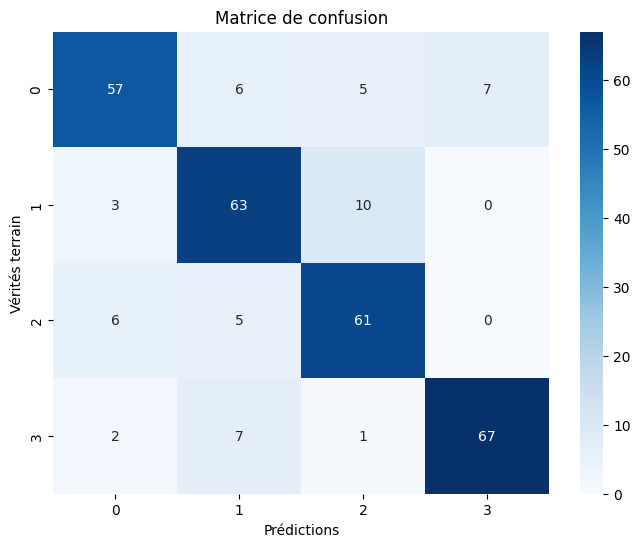

Précision : 0.827


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir y_test en format non binarisé
y_test_non_binarized = y_test.argmax(axis=1)

y_pred = model.predict(X_test)

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test_non_binarized, y_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_non_binarized, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

# Précision globale
print(f"Précision : {accuracy_score(y_test_non_binarized, y_pred):.3f}")


La matrice de confusion montre les performances de classification pour quatre classes (0, 1, 2, 3). Les éléments diagonaux représentent les prédictions correctes (par exemple, 57 pour la classe 0, 63 pour la classe 1), tandis que les éléments hors diagonale indiquent les erreurs de classification (par exemple, 6 instances de la classe 0 ont été prédites comme appartenant à la classe 1). Globalement, la plupart des prédictions sont correctes, ce qui indique une bonne performance du modèle, bien que certaines confusions subsistent entre les classes proches.

In [ ]:
from sklearn.metrics import accuracy_score

y_test_non_binarized = y_test.argmax(axis=1) if y_test.ndim > 1 else y_test

# Prédictions 
y_pred = model.predict(X_test)  

# Calculer l'accuracy
accuracy = accuracy_score(y_test_non_binarized, y_pred)
print(f"Précision globale : {accuracy:.3f}")



Précision globale : 0.827


In [ ]:
from sklearn.metrics import classification_report

y_test_non_binarized = y_test.argmax(axis=1) if y_test.ndim > 1 else y_test

y_pred = model.predict(X_test) 

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test_non_binarized, y_pred, target_names=label_encoder.classes_))


Rapport de classification :
              precision    recall  f1-score   support

        Good       0.84      0.76      0.80        75
   Hazardous       0.78      0.83      0.80        76
    Moderate       0.79      0.85      0.82        72
        Poor       0.91      0.87      0.89        77

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [40]:
from sklearn.model_selection import cross_val_score

# Validation croisée
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Score moyen de validation croisée : {cv_scores.mean():.3f}")


Score moyen de validation croisée : 0.820


# Conclusion
En conclusion, le modèle de classification présente de bonnes performances globales avec des prédictions majoritairement correctes, comme le montrent les courbes ROC et la matrice de confusion. Bien que quelques confusions entre classes existent, le modèle est fiable pour différencier les catégories et peut être utilisé efficacement pour ce problème.